In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
mydata = pd.read_csv("mydata.csv")

In [2]:
mydata_new=mydata
mydata_new=mydata_new.dropna()
mydata_new=mydata_new.astype('float')
mydata_new=mydata_new.reset_index(drop=True)
mydata_new

,Unnamed: 0,feature0,feature1,feature2,feature3_1,feature3_2,feature3_3,feature3_4,feature11,feature12,...,feature69_3,feature69_4,feature69_5,feature69_6,1,2,3,4,5,6
0,0.0,1092.520800,24.730000,3.952400,20.880000,0.000000,0.000000,1368.440000,0.015200,5.228400,...,4.593200,6.601200,1.710800,6.708400,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,684.389444,18.527222,3.968333,12.333333,0.000000,0.000000,1290.888889,0.005000,8.860000,...,2.163333,0.475556,-0.339444,3.132778,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,369.106667,12.888889,3.447778,73.666667,0.000000,479.333333,794.222222,0.146667,11.042222,...,-4.681111,-8.103333,-4.478889,-6.862222,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,261.204286,15.137143,2.047143,32.500000,1184.928571,93.642857,0.000000,0.907143,11.715000,...,-7.741429,-8.435000,-4.255000,-12.586429,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,603.202500,25.222500,2.010833,32.083333,1310.083333,45.750000,0.000000,0.012500,5.756667,...,12.569167,9.187500,13.438333,3.495833,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,2979.0,263.856667,13.133333,2.343333,37.666667,1253.333333,0.000000,294.333333,0.073333,12.533333,...,-12.976667,-14.166667,-12.793333,-15.250000,0.0,0.0,1.0,0.0,0.0,0.0
2446,2980.0,284.380000,15.090000,2.930000,53.000000,0.000000,1514.000000,0.000000,0.000000,6.730000,...,-18.560000,5.250000,3.000000,-8.380000,0.0,0.0,1.0,0.0,0.0,0.0
2447,2981.0,215.077500,14.237500,2.970000,24.000000,0.000000,1573.000000,0.000000,0.000000,8.700000,...,-2.532500,-11.002500,-11.780000,-13.767500,0.0,0.0,1.0,0.0,0.0,0.0
2448,2982.0,247.040000,13.620000,1.980000,33.000000,1568.000000,0.000000,0.000000,0.000000,9.430000,...,-5.130000,-1.310000,3.810000,0.630000,0.0,0.0,1.0,0.0,0.0,0.0


#### Construct Training Set and Testing Set by Random Sampling

In [3]:
sample_num = 30
test_index = []
random.seed( 10 )

for a in range(3): 
    # why 3? since only root 1, 2, 3 are labeled
    # b stores the indeces of all observations that are labeled as a
    b = np.array( mydata_new[mydata_new[str(a+1)]==1].index.tolist() )
    # randomly select sample_num observations in b
    sample_list = [i for i in range(len(b))]
    sample_list = random.sample(sample_list, sample_num)
    test_index.append(b[sample_list])

In [4]:
test_index

[array([1751,  778, 1481, 1564, 2412,  775, 1301, 1542, 1565, 1364, 2000,
        1089, 2385, 1605, 2077, 1401,  784, 1355, 1449,  779, 1470,  870,
        1842, 1434, 1463, 1984, 1365, 1360, 1518, 1199]),
 array([1610, 1342, 1559, 1400, 1190, 1456, 1681, 1333, 1452, 1556, 1402,
         858, 1554,  703, 1702, 1763, 1238, 1766, 1546, 1764, 1622, 1349,
        1547, 1701, 1412, 1506, 1018, 1557, 1511, 1235]),
 array([1630, 2040, 1660, 1045,  966, 2222, 1799, 2449, 1269, 2297, 1287,
        1451, 1973, 2366, 1952, 2438, 1366, 1324, 2107, 1495, 1552, 1899,
        2089, 2043, 2115, 1674, 1741, 1437, 2273, 1524])]

In [5]:
c = np.concatenate(test_index)
c

array([1751,  778, 1481, 1564, 2412,  775, 1301, 1542, 1565, 1364, 2000,
       1089, 2385, 1605, 2077, 1401,  784, 1355, 1449,  779, 1470,  870,
       1842, 1434, 1463, 1984, 1365, 1360, 1518, 1199, 1610, 1342, 1559,
       1400, 1190, 1456, 1681, 1333, 1452, 1556, 1402,  858, 1554,  703,
       1702, 1763, 1238, 1766, 1546, 1764, 1622, 1349, 1547, 1701, 1412,
       1506, 1018, 1557, 1511, 1235, 1630, 2040, 1660, 1045,  966, 2222,
       1799, 2449, 1269, 2297, 1287, 1451, 1973, 2366, 1952, 2438, 1366,
       1324, 2107, 1495, 1552, 1899, 2089, 2043, 2115, 1674, 1741, 1437,
       2273, 1524])

In [6]:
mytestdata = mydata_new.loc[c,:]

In [7]:
mytraindata = mydata_new.drop(index=c)

#### Modeling Multivariate Gaussian Distribution

In [8]:
def MVNormalPara(X):
    return np.mean(X,axis=0), np.cov(X.T)

In [9]:
# calculate mean and variance of multivariate Gaussian distribution model of observations labeled root 1
X_R1_1 = mytraindata[mytraindata["1"]==1][["feature15","feature13"]].values
mu_R1_1, cov_R1_1 = MVNormalPara(X_R1_1)

# calculate mean and variance of multivariate Gaussian distribution model of observations not labeled root 1
X_R1_0 = mytraindata[mytraindata["1"]==0][["feature15","feature13"]].values
mu_R1_0, cov_R1_0 = MVNormalPara(X_R1_0)

In [10]:
# calculate mean and variance of multivariate Gaussian distribution model of observations not labeled root 2
X_R2_0 = mytraindata[mytraindata["2"]==0][[\
    "feature19",\
    "feature61_0", "feature61_1","feature61_2",  "feature61_3","feature61_4","feature61_5","feature61_6","feature61_7",\
    "feature69_0", "feature69_1","feature69_2","feature69_3","feature69_4",  "feature69_5","feature69_6", \
    "feature28_0", "feature28_1","feature28_2",  "feature28_3","feature28_4","feature28_5","feature28_6","feature28_7",\
    "feature36_0", "feature36_1","feature36_2",  "feature36_3","feature36_4", "feature36_5","feature36_6","feature36_7"\
    ]].values
mu_R2_0, cov_R2_0 = MVNormalPara(X_R2_0)

# calculate mean and variance of multivariate Gaussian distribution model of observations labeled root 2
X_R2_1 = mytraindata[mytraindata["2"]==1][[\
    "feature19",\
    "feature61_0", "feature61_1","feature61_2",  "feature61_3","feature61_4","feature61_5","feature61_6","feature61_7",\
    "feature69_0", "feature69_1","feature69_2","feature69_3","feature69_4",  "feature69_5","feature69_6", \
    "feature28_0", "feature28_1","feature28_2",  "feature28_3","feature28_4","feature28_5","feature28_6","feature28_7",\
    "feature36_0", "feature36_1","feature36_2",  "feature36_3","feature36_4", "feature36_5","feature36_6","feature36_7"\
    ]].values
mu_R2_1,cov_R2_1=MVNormalPara(X_R2_1)

In [11]:
# calculate mean and variance of multivariate Gaussian distribution model of observations not labeled root 3
X_R3_0 = mytraindata[mytraindata["3"]==0][[\
    "feature60",\
    "feature61_0", "feature61_1","feature61_2",  "feature61_3","feature61_4","feature61_5","feature61_6","feature61_7",\
    "feature69_0", "feature69_1","feature69_2","feature69_3","feature69_4",  "feature69_5","feature69_6", \
    "feature20_0","feature20_1","feature20_2","feature20_3","feature20_4", "feature20_5","feature20_6","feature20_7", 
    "feature28_0","feature28_1","feature28_2","feature28_3","feature28_4","feature28_5","feature28_6","feature28_7",\
    "feature36_0", "feature36_1","feature36_2","feature36_3","feature36_4","feature36_5","feature36_6","feature36_7"\
    ]].values
mu_R3_0,cov_R3_0=MVNormalPara(X_R3_0)

# calculate mean and variance of multivariate Gaussian distribution model of observations labeled root 3
X_R3_1 = mytraindata[mytraindata["3"]==1][[\
    "feature60",\
    "feature61_0", "feature61_1","feature61_2",  "feature61_3","feature61_4","feature61_5","feature61_6","feature61_7",\
    "feature69_0", "feature69_1","feature69_2","feature69_3","feature69_4",  "feature69_5","feature69_6", \
    "feature20_0","feature20_1","feature20_2","feature20_3","feature20_4", "feature20_5","feature20_6","feature20_7", 
    "feature28_0","feature28_1","feature28_2","feature28_3","feature28_4","feature28_5","feature28_6","feature28_7",\
    "feature36_0", "feature36_1","feature36_2","feature36_3","feature36_4","feature36_5","feature36_6","feature36_7"\
    ]].values
mu_R3_1,cov_R3_1=MVNormalPara(X_R3_1)

In [12]:
from scipy.stats import multivariate_normal
pdf_R1, pdf_R2, pdf_R3 = [],[],[]
P_R1, P_R2, P_R3 = [0.5,0.5],[0.5,0.5],[0.5,0.5] # prior

pdf_R1.append( multivariate_normal(mu_R1_0,cov_R1_0) )
pdf_R1.append( multivariate_normal(mu_R1_1,cov_R1_1) )

pdf_R2.append( multivariate_normal(mu_R2_0,cov_R2_0) )
pdf_R2.append( multivariate_normal(mu_R2_1,cov_R2_1+np.eye(32)*0.0000001) )

pdf_R3.append( multivariate_normal(mu_R3_0,cov_R3_0) )
pdf_R3.append( multivariate_normal(mu_R3_1,cov_R3_1) )

# posterior function
def pro_product(sample,r1,r2,r3):
    likelihood1=pdf_R1[r1].pdf(sample[["feature15","feature13"]].values)

    likelihood2=pdf_R2[r2].pdf(sample[[\
    "feature19",\
    "feature61_0", "feature61_1","feature61_2",  "feature61_3","feature61_4","feature61_5","feature61_6","feature61_7",\
    "feature69_0", "feature69_1","feature69_2","feature69_3","feature69_4",  "feature69_5","feature69_6", \
    "feature28_0", "feature28_1","feature28_2",  "feature28_3","feature28_4","feature28_5","feature28_6","feature28_7",\
    "feature36_0", "feature36_1","feature36_2",  "feature36_3","feature36_4", "feature36_5","feature36_6","feature36_7"\
    ]].values)

    likelihood3=pdf_R3[r3].pdf(sample[[\
    "feature60",\
    "feature61_0", "feature61_1","feature61_2",  "feature61_3","feature61_4","feature61_5","feature61_6","feature61_7",\
    "feature69_0", "feature69_1","feature69_2","feature69_3","feature69_4",  "feature69_5","feature69_6", \
    "feature20_0","feature20_1","feature20_2","feature20_3","feature20_4", "feature20_5","feature20_6","feature20_7", 
    "feature28_0","feature28_1","feature28_2","feature28_3","feature28_4","feature28_5","feature28_6","feature28_7",\
    "feature36_0", "feature36_1","feature36_2","feature36_3","feature36_4","feature36_5","feature36_6","feature36_7"\
    ]].values)

    return likelihood1 * likelihood2 * likelihood3 * P_R1[r1] * P_R2[r2] * P_R3[r3]

#### Prediction

In [13]:
def test(Xtest):
    A=[]
    for r1 in range(2):
        for r2 in range(2):
            for r3 in range(2):
                A.append( [r1,r2,r3,pro_product(Xtest,r1,r2,r3)] )
    A = np.array(A)    
    # print(A)
    A[:,3] = A[:,3]/sum(A[:,3])
    # print('Pr root cause 1 :',sum(A[A[:,0]==1][:,3]))
    # print('Pr root cause 2 :',sum(A[A[:,1]==1][:,3]))
    # print('Pr root cause 3 :',sum(A[A[:,2]==1][:,3]))
    return sum(A[A[:,0]==1][:,3]), sum(A[A[:,1]==1][:,3]), sum(A[A[:,2]==1][:,3])

In [14]:
pred = np.zeros([mytestdata.shape[0],6])

for i in range(mytestdata.shape[0]):
    pred[i,0], pred[i,1], pred[i,2] = test(mytestdata[i:i+1])

In [15]:
# set 0.8 as the threshold
pred = pred>0.8

#### Score Calculation and Result Plotting

In [16]:
label = mytestdata[['1','2','3','4','5','6']].values

In [17]:
# Score Calculation
plus=np.sum(pred*label,axis=1)
minus=np.sum(pred*(1-label),axis=1)
np.mean((plus-minus)/np.sum(label,axis=1))

0.4222222222222222

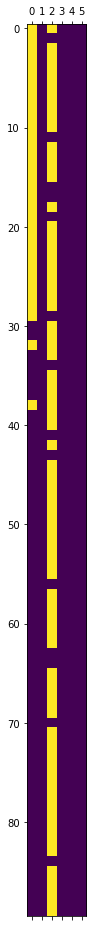

In [18]:
# Result Plotting
plt.matshow(pred)

## NN training

In [19]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
torch.manual_seed(42)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(56, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 6)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

net = Net()

criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [20]:
X_tr=mytraindata.values[:,1:57]
y_tr=mytraindata.values[:,57:]

In [21]:
X_tr=X_tr[~(y_tr==0).all(1)]
y_tr = y_tr[~(y_tr==0).all(1)]

In [22]:
np.sum(y_tr[~(y_tr==0).all(1)],axis=0)

array([  70.,   32., 1187.,    0.,    0.,    0.])

In [23]:
import torch
torch.Tensor(y_tr)

tensor([[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]])

In [24]:
torch_dataset = torch.utils.data.TensorDataset(torch.Tensor(X_tr),torch.Tensor(y_tr) )
BATCH_SIZE=400
trainloader = torch.utils.data.DataLoader(
    dataset=torch_dataset,      
    batch_size=BATCH_SIZE,      
    shuffle=True,               
    num_workers=2,              
)

In [25]:
for epoch in range(1000):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.8f' % (epoch + 1, i + 1, running_loss / 2))
            running_loss = 0.0

print('Finished Training')

[1,     2] loss: 49.35781288
[1,     4] loss: 49.48698997


/home/home1/student/tianjian1/.conda/envs/ml/lib/python3.8/site-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[2,     2] loss: 49.45405769
[2,     4] loss: 49.06234741
[3,     2] loss: 49.30017281
[3,     4] loss: 49.65315056
[4,     2] loss: 49.53316116
[4,     4] loss: 49.20077133
[5,     2] loss: 49.37403297
[5,     4] loss: 49.68750000
[6,     2] loss: 49.42422867
[6,     4] loss: 49.30798912
[7,     2] loss: 49.21551323
[7,     4] loss: 49.73454666
[8,     2] loss: 49.36096764
[8,     4] loss: 49.36949158
[9,     2] loss: 49.42913818
[9,     4] loss: 49.51938820
[10,     2] loss: 49.36043358
[10,     4] loss: 49.56975174
[11,     2] loss: 49.36004066
[11,     4] loss: 49.45820999
[12,     2] loss: 49.07192993
[12,     4] loss: 49.47764397
[13,     2] loss: 56.22270966
[13,     4] loss: 64.06983566
[14,     2] loss: 64.19390488
[14,     4] loss: 64.26041794
[15,     2] loss: 56.27703476
[15,     4] loss: 17.02604198
[16,     2] loss: 17.12500000
[16,     4] loss: 17.34895802
[17,     2] loss: 17.18750000
[17,     4] loss: 17.28645802
[18,     2] loss: 17.16666698
[18,     4] loss: 16.97916

[138,     2] loss: 17.20833302
[138,     4] loss: 16.93750000
[139,     2] loss: 17.27083397
[139,     4] loss: 17.09375000
[140,     2] loss: 17.08333302
[140,     4] loss: 17.06250000
[141,     2] loss: 17.14583302
[141,     4] loss: 17.10937500
[142,     2] loss: 17.18750000
[142,     4] loss: 16.95833302
[143,     2] loss: 17.14583302
[143,     4] loss: 17.21875000
[144,     2] loss: 17.02083397
[144,     4] loss: 17.34375000
[145,     2] loss: 17.27083302
[145,     4] loss: 16.98437500
[146,     2] loss: 17.22916698
[146,     4] loss: 17.02604198
[147,     2] loss: 17.16666698
[147,     4] loss: 17.19791698
[148,     2] loss: 17.22916603
[148,     4] loss: 17.24479103
[149,     2] loss: 17.06250000
[149,     4] loss: 17.52083397
[150,     2] loss: 17.20833302
[150,     4] loss: 17.15625000
[151,     2] loss: 17.12500000
[151,     4] loss: 17.02083302
[152,     2] loss: 17.16666603
[152,     4] loss: 17.52604198
[153,     2] loss: 17.12500000
[153,     4] loss: 17.45833397
[154,   

[271,     2] loss: 17.08333397
[271,     4] loss: 17.28125000
[272,     2] loss: 17.12500000
[272,     4] loss: 17.13020897
[273,     2] loss: 17.18750000
[273,     4] loss: 17.17708302
[274,     2] loss: 17.14583302
[274,     4] loss: 17.21875000
[275,     2] loss: 17.27083302
[275,     4] loss: 17.20312500
[276,     2] loss: 17.20833302
[276,     4] loss: 17.04687500
[277,     2] loss: 17.31250000
[277,     4] loss: 17.16145802
[278,     2] loss: 17.18750000
[278,     4] loss: 17.17708302
[279,     2] loss: 17.16666603
[279,     4] loss: 17.19791698
[280,     2] loss: 17.22916698
[280,     4] loss: 16.91666603
[281,     2] loss: 17.12500000
[281,     4] loss: 17.45833397
[282,     2] loss: 17.29166698
[282,     4] loss: 16.85416603
[283,     2] loss: 17.25000000
[283,     4] loss: 17.00520897
[284,     2] loss: 17.10416603
[284,     4] loss: 17.58854198
[285,     2] loss: 17.27083302
[285,     4] loss: 16.98437500
[286,     2] loss: 17.10416698
[286,     4] loss: 17.36979103
[287,   

[404,     2] loss: 17.06250000
[404,     4] loss: 17.30208302
[405,     2] loss: 17.10416698
[405,     4] loss: 17.47916698
[406,     2] loss: 17.29166698
[406,     4] loss: 16.96354198
[407,     2] loss: 17.18750000
[407,     4] loss: 17.61458302
[408,     2] loss: 17.27083302
[408,     4] loss: 16.87500000
[409,     2] loss: 17.20833302
[409,     4] loss: 17.15625000
[410,     2] loss: 17.12500000
[410,     4] loss: 17.13020897
[411,     2] loss: 17.10416603
[411,     4] loss: 17.15104198
[412,     2] loss: 17.14583397
[412,     4] loss: 17.10937500
[413,     2] loss: 17.04166698
[413,     4] loss: 17.32291698
[414,     2] loss: 17.16666698
[414,     4] loss: 17.30729103
[415,     2] loss: 17.25000000
[415,     4] loss: 17.00520897
[416,     2] loss: 17.22916603
[416,     4] loss: 17.13541698
[417,     2] loss: 17.14583397
[417,     4] loss: 17.21875000
[418,     2] loss: 17.12500000
[418,     4] loss: 17.56770802
[419,     2] loss: 17.16666698
[419,     4] loss: 17.30729103
[420,   

[537,     2] loss: 17.10416698
[537,     4] loss: 17.26041698
[538,     2] loss: 17.14583302
[538,     4] loss: 17.32812500
[539,     2] loss: 17.16666603
[539,     4] loss: 17.19791698
[540,     2] loss: 17.20833302
[540,     4] loss: 16.93750000
[541,     2] loss: 17.27083302
[541,     4] loss: 16.98437500
[542,     2] loss: 17.25000000
[542,     4] loss: 17.00520897
[543,     2] loss: 17.31250000
[543,     4] loss: 16.83333302
[544,     2] loss: 17.25000000
[544,     4] loss: 17.00520897
[545,     2] loss: 17.16666698
[545,     4] loss: 17.41666698
[546,     2] loss: 17.14583397
[546,     4] loss: 17.54687500
[547,     2] loss: 17.12500000
[547,     4] loss: 17.45833397
[548,     2] loss: 17.10416603
[548,     4] loss: 17.04166603
[549,     2] loss: 17.27083302
[549,     4] loss: 16.98437500
[550,     2] loss: 17.12500000
[550,     4] loss: 17.23958302
[551,     2] loss: 17.14583302
[551,     4] loss: 17.00000000
[552,     2] loss: 17.20833302
[552,     4] loss: 17.37500000
[553,   

[670,     2] loss: 17.22916698
[670,     4] loss: 16.91666603
[671,     2] loss: 17.12500000
[671,     4] loss: 17.23958302
[672,     2] loss: 17.18750000
[672,     4] loss: 17.17708302
[673,     2] loss: 17.27083397
[673,     4] loss: 16.87500000
[674,     2] loss: 17.02083397
[674,     4] loss: 17.45312500
[675,     2] loss: 17.16666603
[675,     4] loss: 17.30729103
[676,     2] loss: 17.10416698
[676,     4] loss: 17.26041698
[677,     2] loss: 17.27083397
[677,     4] loss: 17.42187500
[678,     2] loss: 17.16666698
[678,     4] loss: 16.97916603
[679,     2] loss: 17.08333302
[679,     4] loss: 17.50000000
[680,     2] loss: 17.14583302
[680,     4] loss: 17.32812500
[681,     2] loss: 17.18750000
[681,     4] loss: 17.50520802
[682,     2] loss: 17.16666698
[682,     4] loss: 17.19791698
[683,     2] loss: 17.35416603
[683,     4] loss: 16.90104198
[684,     2] loss: 17.18750000
[684,     4] loss: 17.06770897
[685,     2] loss: 17.18750000
[685,     4] loss: 17.39583397
[686,   

[803,     2] loss: 17.08333302
[803,     4] loss: 17.60937500
[804,     2] loss: 17.16666603
[804,     4] loss: 17.08854198
[805,     2] loss: 17.14583302
[805,     4] loss: 17.10937500
[806,     2] loss: 17.08333302
[806,     4] loss: 17.39062500
[807,     2] loss: 17.22916603
[807,     4] loss: 17.02604198
[808,     2] loss: 17.20833302
[808,     4] loss: 17.15625000
[809,     2] loss: 17.22916698
[809,     4] loss: 16.91666603
[810,     2] loss: 17.31250000
[810,     4] loss: 17.05208302
[811,     2] loss: 17.27083302
[811,     4] loss: 16.87500000
[812,     2] loss: 17.25000000
[812,     4] loss: 17.11458302
[813,     2] loss: 17.22916603
[813,     4] loss: 16.91666603
[814,     2] loss: 17.22916698
[814,     4] loss: 17.13541698
[815,     2] loss: 17.18750000
[815,     4] loss: 17.28645802
[816,     2] loss: 17.33333302
[816,     4] loss: 17.03125000
[817,     2] loss: 17.00000000
[817,     4] loss: 17.69270802
[818,     2] loss: 17.22916698
[818,     4] loss: 16.91666603
[819,   

[936,     2] loss: 17.29166603
[936,     4] loss: 16.96354198
[937,     2] loss: 17.16666698
[937,     4] loss: 17.08854198
[938,     2] loss: 17.14583397
[938,     4] loss: 17.21875000
[939,     2] loss: 17.10416603
[939,     4] loss: 17.47916698
[940,     2] loss: 17.20833302
[940,     4] loss: 17.04687500
[941,     2] loss: 17.06250000
[941,     4] loss: 17.30208302
[942,     2] loss: 17.22916603
[942,     4] loss: 17.24479103
[943,     2] loss: 17.06250000
[943,     4] loss: 17.52083397
[944,     2] loss: 17.18750000
[944,     4] loss: 16.95833302
[945,     2] loss: 17.18750000
[945,     4] loss: 17.06770897
[946,     2] loss: 17.02083302
[946,     4] loss: 17.45312500
[947,     2] loss: 17.12500000
[947,     4] loss: 17.23958302
[948,     2] loss: 17.25000000
[948,     4] loss: 16.89583302
[949,     2] loss: 17.14583397
[949,     4] loss: 17.32812500
[950,     2] loss: 17.00000000
[950,     4] loss: 17.47395802
[951,     2] loss: 17.31250000
[951,     4] loss: 17.05208302
[952,   

In [26]:
net(torch.Tensor(mytestdata.values[:,1:57])).detach().numpy()

array([[1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1.

In [27]:
def score(pred,label):
    plus=np.sum(pred*label,axis=1)
    minus=np.sum(pred*(1-label),axis=1)
    return np.mean((plus-minus)/np.sum(label,axis=1))

In [28]:
score(net(torch.Tensor(mytestdata.values[:,1:57])).detach().numpy(),label)

-0.08888888888888889